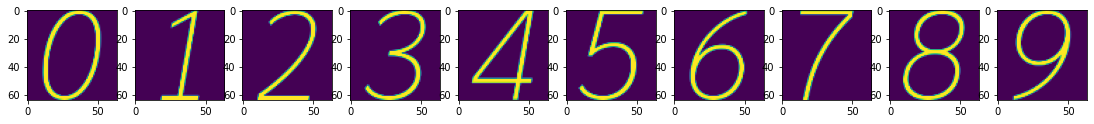

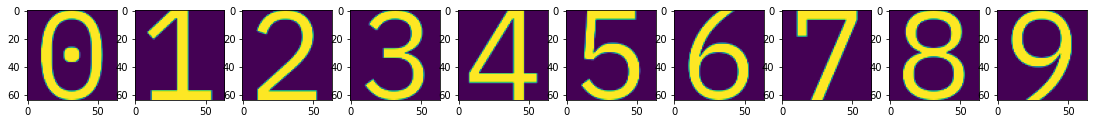

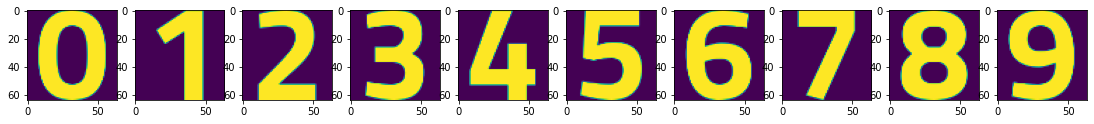

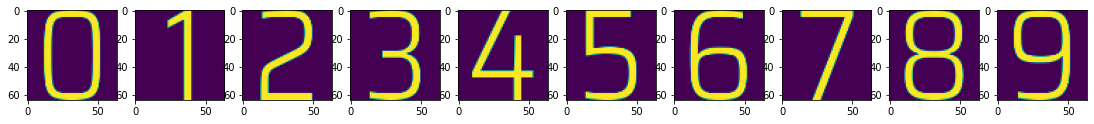

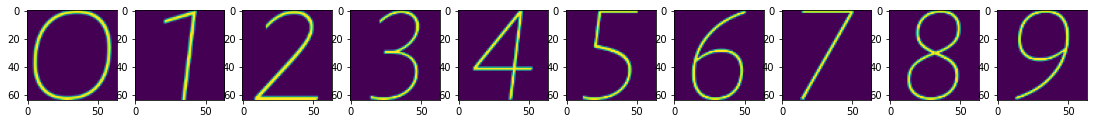

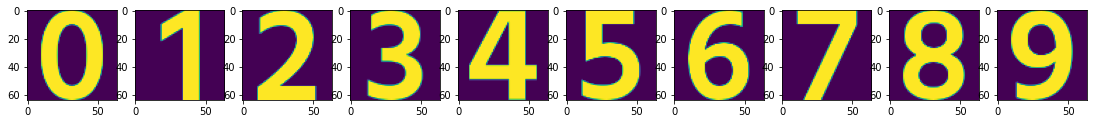

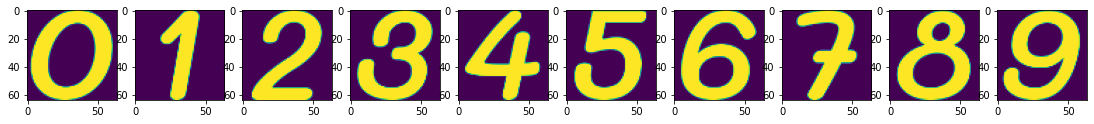

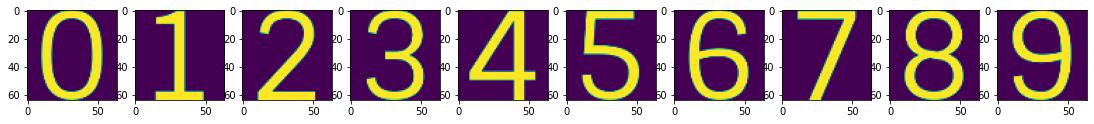

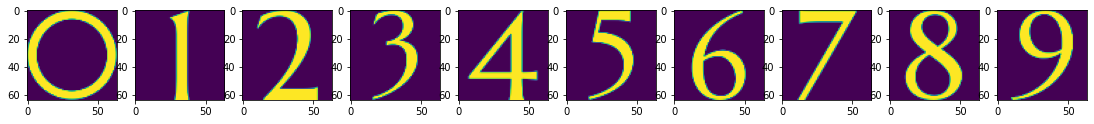

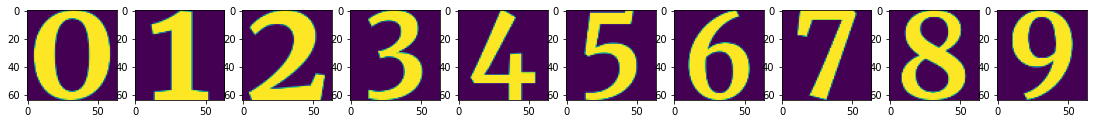

In [67]:
from freetype import Face
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import sys
import os
import pandas as pd

def visualize_digits(font_path, pic_size):
    pic_size = int(pic_size)
    face = Face(font_path)
    face.set_pixel_sizes(3*pic_size, 0)
    
    fig, axs = plt.subplots(1, 10, figsize=(19,5))
    for i in range(10):
        face.load_char(str(i))
        bitmap = face.glyph.bitmap
        img = np.array(bitmap.buffer).reshape(bitmap.rows,-1)
        h,w = img.shape
        # pad digit glyph to square
        if h >= w:
            left = (h-w)//2
            right = h - w - left
            top, bottom = 0, 0
        else:
            top = (w-h)//2
            bottom = w - h - top
            left, right = 0, 0
        img = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT) # square
        # resize
        img = cv2.resize(img.astype('float32'), (pic_size,pic_size))
        axs[i].imshow(img)
        

# font_list = glob.glob('/Users/davidyuk/Downloads/5000_Fonts/*.ttf')
for font_path_ in np.random.choice(data_frame.path, 10):
    visualize_digits(font_path_, 64)

In [22]:
from fontbakery.utils import get_FamilyProto_Message
message = get_FamilyProto_Message('/Users/davidyuk/Projects/conflicting_tasks_learning/dataset/fonts/ofl/abeezee/METADATA.pb')

In [70]:
# stores data in format [font name, path to font, category, style, weight, subsets]
parsed_metadata = []
for dirpath, dirnames, filenames in os.walk('/Users/davidyuk/Projects/conflicting_tasks_learning/dataset/fonts/ofl/'):
    
    metadataProtoFile = os.path.join(dirpath, 'METADATA.pb')
    if not os.path.exists(metadataProtoFile):
        continue
    try:
        message = get_FamilyProto_Message(metadataProtoFile)
    except Exception as e:
        print(metadataProtoFile)
        print(repr(e))
        continue
    name = message.name
    cat = message.category
    subsets = message.subsets
    for font in message.fonts:
        style = font.style
        weight = font.weight
        filename = font.filename
        font_line = [name, os.path.join(dirpath, font.filename), cat, style, weight, subsets]
        parsed_metadata.append(font_line)
        
data_frame = pd.DataFrame(parsed_metadata, columns=['name', 'path', 'category', 'style', 'weight', 'subsets'])

In [71]:
data_frame

,name,path,category,style,weight,subsets
0,Londrina Solid,/Users/davidyuk/Projects/conflicting_tasks_lea...,DISPLAY,normal,100,"[latin, menu]"
1,Londrina Solid,/Users/davidyuk/Projects/conflicting_tasks_lea...,DISPLAY,normal,300,"[latin, menu]"
2,Londrina Solid,/Users/davidyuk/Projects/conflicting_tasks_lea...,DISPLAY,normal,400,"[latin, menu]"
3,Londrina Solid,/Users/davidyuk/Projects/conflicting_tasks_lea...,DISPLAY,normal,900,"[latin, menu]"
4,Baloo Bhai 2,/Users/davidyuk/Projects/conflicting_tasks_lea...,DISPLAY,normal,400,"[gujarati, latin, latin-ext, menu, vietnamese]"
...,...,...,...,...,...,...
2748,Carrois Gothic,/Users/davidyuk/Projects/conflicting_tasks_lea...,SANS_SERIF,normal,400,"[latin, menu]"
2749,Noticia Text,/Users/davidyuk/Projects/conflicting_tasks_lea...,SERIF,normal,400,"[menu, latin, latin-ext, vietnamese]"
2750,Noticia Text,/Users/davidyuk/Projects/conflicting_tasks_lea...,SERIF,italic,400,"[menu, latin, latin-ext, vietnamese]"
2751,Noticia Text,/Users/davidyuk/Projects/conflicting_tasks_lea...,SERIF,normal,700,"[menu, latin, latin-ext, vietnamese]"


name: "Noticia Text"
style: "normal"
weight: 400
filename: "NoticiaText-Regular.ttf"
post_script_name: "NoticiaText-Regular"
full_name: "Noticia Text"
copyright: "Copyright (c) 2011 JM Sole (info@jmsole.cl), with Reserved Font Name \"Noticia Text\"."
 

name: "Noticia Text"
style: "italic"
weight: 400
filename: "NoticiaText-Italic.ttf"
post_script_name: "NoticiaText-Italic"
full_name: "Noticia Text Italic"
copyright: "Copyright (c) 2011 JM Sole (info@jmsole.cl), with Reserved Font Name \"Noticia Text\"."
 

name: "Noticia Text"
style: "normal"
weight: 700
filename: "NoticiaText-Bold.ttf"
post_script_name: "NoticiaText-Bold"
full_name: "Noticia Text Bold"
copyright: "Copyright (c) 2011 JM Sole (info@jmsole.cl), with Reserved Font Name \"Noticia Text\"."
 

name: "Noticia Text"
style: "italic"
weight: 700
filename: "NoticiaText-BoldItalic.ttf"
post_script_name: "NoticiaText-BoldItalic"
full_name: "Noticia Text Bold Italic"
copyright: "Copyright (c) 2011 JM Sole (info@jmsole.cl), with Res

In [29]:
# from freetype import *
# face = Face(path)

# print ('Family name:         {}'.format(face.family_name))
# print ('Style name:          {}'.format(face.style_name))
# print ('Charmaps:            {}'.format([charmap.encoding_name for charmap in face.charmaps]))
# print ('')
# print ('Face number:         {}'.format(face.num_faces))
# print ('Glyph number:        {}'.format(face.num_glyphs))
# print ('Available sizes:     {}'.format(face.available_sizes))
# print ('')
# print ('units per em:        {}'.format(face.units_per_EM))
# print ('ascender:            {}'.format(face.ascender))
# print ('descender:           {}'.format(face.descender))
# print ('height:              {}'.format(face.height))
# print ('')
# print ('max_advance_width:   {}'.format(face.max_advance_width))
# print ('max_advance_height:  {}'.format(face.max_advance_height))
# print ('')
# print ('underline_position:  {}'.format(face.underline_position))
# print ('underline_thickness: {}'.format(face.underline_thickness))
# print ('')
# print ('Has horizontal:      {}'.format(face.has_horizontal))
# print ('Has vertical:        {}'.format(face.has_vertical))
# print ('Has kerning:         {}'.format(face.has_kerning))
# print ('Is fixed width:      {}'.format(face.is_fixed_width))
# print ('Is scalable:         {}'.format(face.is_scalable))
# print ('')